In [1]:
import json
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

# Circles Example

In [3]:
data, target = make_circles(n_samples=500, noise=.05, factor=.5)

In [4]:
color = [["red", "blue"][elem] for elem in target]

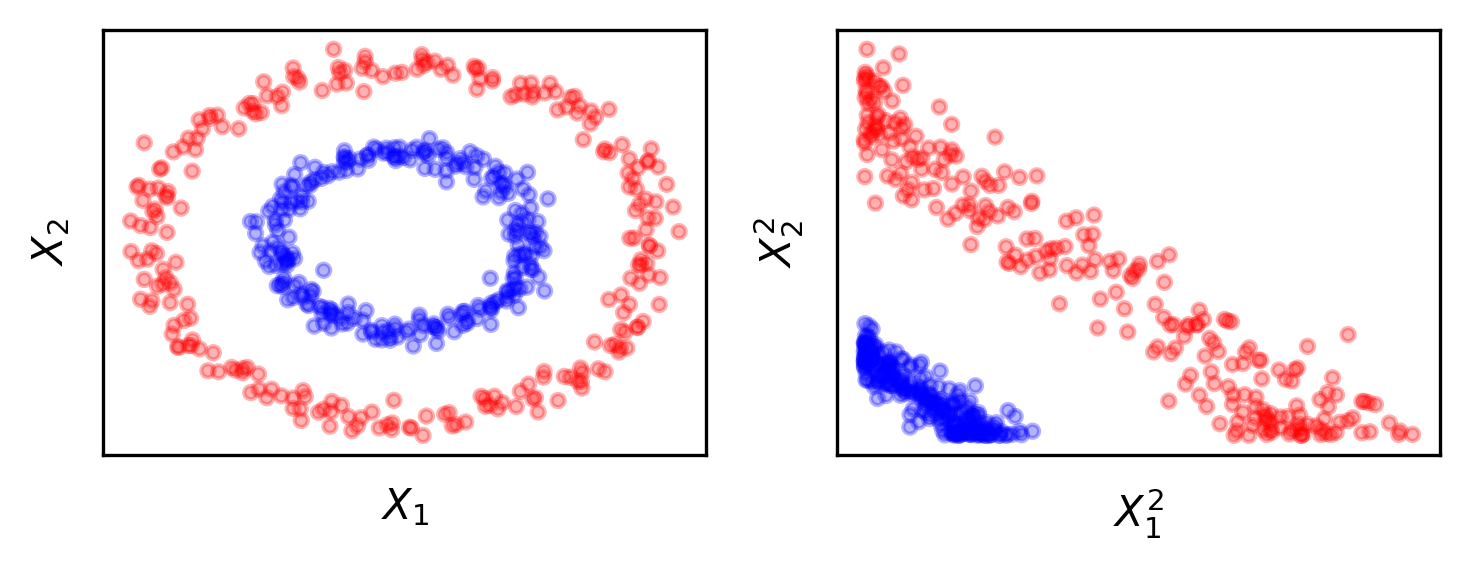

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(5, 2), dpi=300)
ax[0].scatter(data[:, 0], data[:, 1], color=color, alpha=.3, s=10)
ax[1].scatter(data[:, 0]**2, data[:, 1]**2, color=color, alpha=.3, s=10)

ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticks([])

ax[0].set_xlabel("$X_1$")
ax[0].set_ylabel("$X_2$")

ax[1].set_xlabel("$X_1^2$")
ax[1].set_ylabel("$X_2^2$")

plt.tight_layout()
plt.savefig("circles.pdf")

# Default Metrics

In [6]:
from src.datasets import alldts
from src.metrics import cluster_evaluate

In [7]:
selection = {"cred_aus", "cred_ger", "breast_coimbra", "sonar", "heart"}
datasets = [(k, v) for k, v in alldts().items() if k in selection]

In [8]:
aux = list()
for dataset_name, (data, target) in datasets:
    aux.append(dict({"dataset": dataset_name}, **cluster_evaluate(data, target)))

In [9]:
pd.DataFrame(aux)

,dataset,silhouette_score,sil_neg_samples_score,calinski_harabasz_score,davies_bouldin_score
0,cred_aus,0.053858,0.262319,27.747245,4.544958
1,cred_ger,0.012343,0.273000,8.946278,9.466610
2,breast_coimbra,0.023419,0.413793,5.092652,4.223749
3,sonar,0.035338,0.326923,8.906266,4.595280
4,heart,0.101432,0.162963,29.881538,2.852883


# Results

In [49]:
files = glob("src/results/*.json")

aux = list()
for file in files:
    with open(file, "r") as f:
        aux.append(json.load(f))
df = pd.json_normalize(aux)

In [50]:
df["acc_diff"] = (df["acc_test"] - df["acc_train"]).abs()

In [51]:
df.head()

,dataset,time,alpha,acc_train,acc_test,best_loss,iterations,silhouette_score,sil_neg_samples_score,calinski_harabasz_score,davies_bouldin_score,orig_silhouette_score,orig_sil_neg_samples_score,orig_calinski_harabasz_score,orig_davies_bouldin_score,acc_diff
0,sonar,2.962690,12.857143,0.972414,0.777778,0.777809,1024,0.700893,0.027586,505.973647,0.408799,0.038851,0.324138,7.034692,4.323911,0.194636
1,heart,2.994267,18.571429,0.555556,0.555556,0.694096,1024,0.000000,1.000000,1884.921029,0.000000,0.099904,0.158730,21.809588,2.802286,0.000000
2,sonar,2.848178,18.571429,0.531034,0.539683,0.701226,1024,0.000000,1.000000,73.193301,0.000000,0.038681,0.317241,7.215285,4.238644,0.008648
3,cred_aus,8.442416,4.285714,0.902692,0.855072,0.464397,1024,0.619166,0.101449,923.681763,0.522566,0.055026,0.287785,20.070193,4.466039,0.047619
4,cred_aus,8.680636,7.142857,0.896480,0.840580,0.553811,1024,0.615524,0.107660,995.352109,0.504035,0.060301,0.310559,21.616567,4.379102,0.055901


<AxesSubplot: xlabel='alpha', ylabel='silhouette_score'>

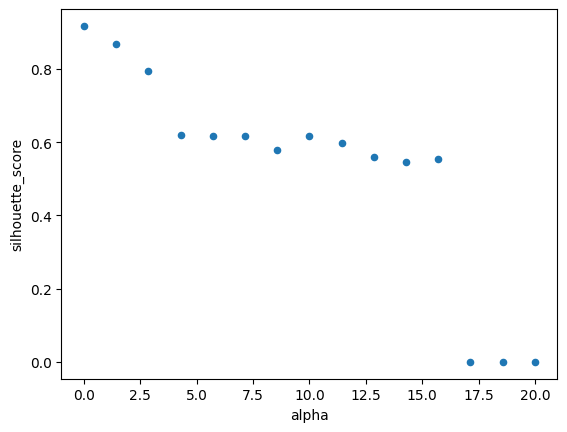

In [55]:
df[df["dataset"] == "cred_aus"].plot.scatter(x="alpha", y="silhouette_score")

<AxesSubplot: xlabel='acc_diff', ylabel='silhouette_score'>

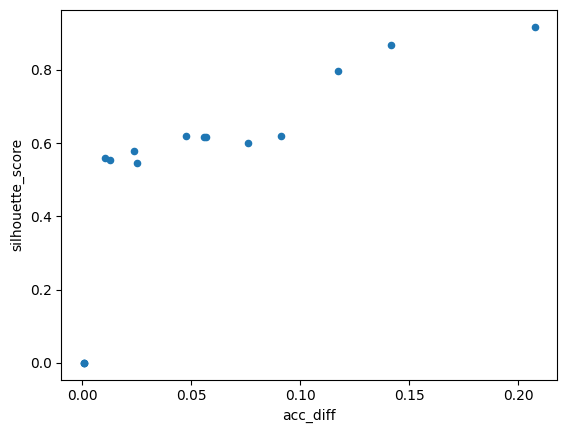

In [56]:
df[df["dataset"] == "cred_aus"].plot.scatter(x="acc_diff", y="silhouette_score")

In [30]:
df.groupby("dataset").mean()

,time,alpha,acc_train,acc_test,best_loss,iterations,silhouette_score,sil_neg_samples_score,calinski_harabasz_score,davies_bouldin_score,acc_diff
dataset,,,,,,,,,,,
breast_coimbra,2.755163,0.899213,0.931687,0.733810,0.266326,957.033333,0.091282,0.288889,10.098462,3.583602,0.202745
cred_aus,16.237959,0.864397,0.953910,0.844816,0.166412,942.246154,0.232289,0.133301,233.995412,2.064736,0.110304
cred_ger,24.276225,0.899213,0.956500,0.745389,0.185677,959.650000,0.062559,0.222286,60.352253,5.263048,0.211111
heart,6.027637,0.899213,0.963580,0.812346,0.146237,1002.166667,0.214652,0.138360,80.686035,1.957491,0.155526
sonar,5.780732,0.899213,0.999195,0.807937,0.080685,1024.000000,0.174555,0.120805,36.898848,2.140599,0.191259


In [26]:
df

,alpha,acc_train,acc_test,best_loss,iterations,silhouette_score,sil_neg_samples_score,calinski_harabasz_score,davies_bouldin_score,acc_diff
0,0.000000,0.993789,0.797101,0.012605,1024,0.086840,0.155280,46.229656,3.163873,0.196687
1,1.832981,0.854286,0.786667,0.410940,1024,0.081245,0.308571,57.725481,2.895714,0.067619
2,0.172521,1.000000,0.756667,0.076238,1024,0.022373,0.212857,12.200317,6.915754,0.243333
3,1.528307,1.000000,0.793651,0.138782,1024,0.212515,0.082759,43.039692,1.722140,0.206349
4,2.636651,0.814286,0.786667,0.458974,1024,0.152497,0.252857,130.078353,1.869525,0.027619
...,...,...,...,...,...,...,...,...,...,...
2084,2.198393,0.904762,0.827160,0.301873,953,0.473036,0.105820,261.772579,0.679857,0.077601
2085,2.198393,0.862434,0.876543,0.356933,966,0.434230,0.137566,220.624824,0.735506,-0.014109
2086,0.206914,1.000000,0.720000,0.081331,1024,0.026039,0.180000,15.000127,6.228773,0.280000
2087,0.615848,0.960663,0.797101,0.185483,1024,0.185520,0.128364,122.598148,1.923020,0.163561


In [14]:
df["dataset"].unique()

array(['cred_ger', 'cred_aus', 'breast_coimbra', 'heart', 'sonar'],
      dtype=object)

In [15]:
colors = {
    "cred_ger": "red",
    "cred_aus": "blue",
    "breast_coimbra": "green",
    "heart": "black",
    "sonar": "purple",
}

In [16]:
import matplotlib.patches as mpatches

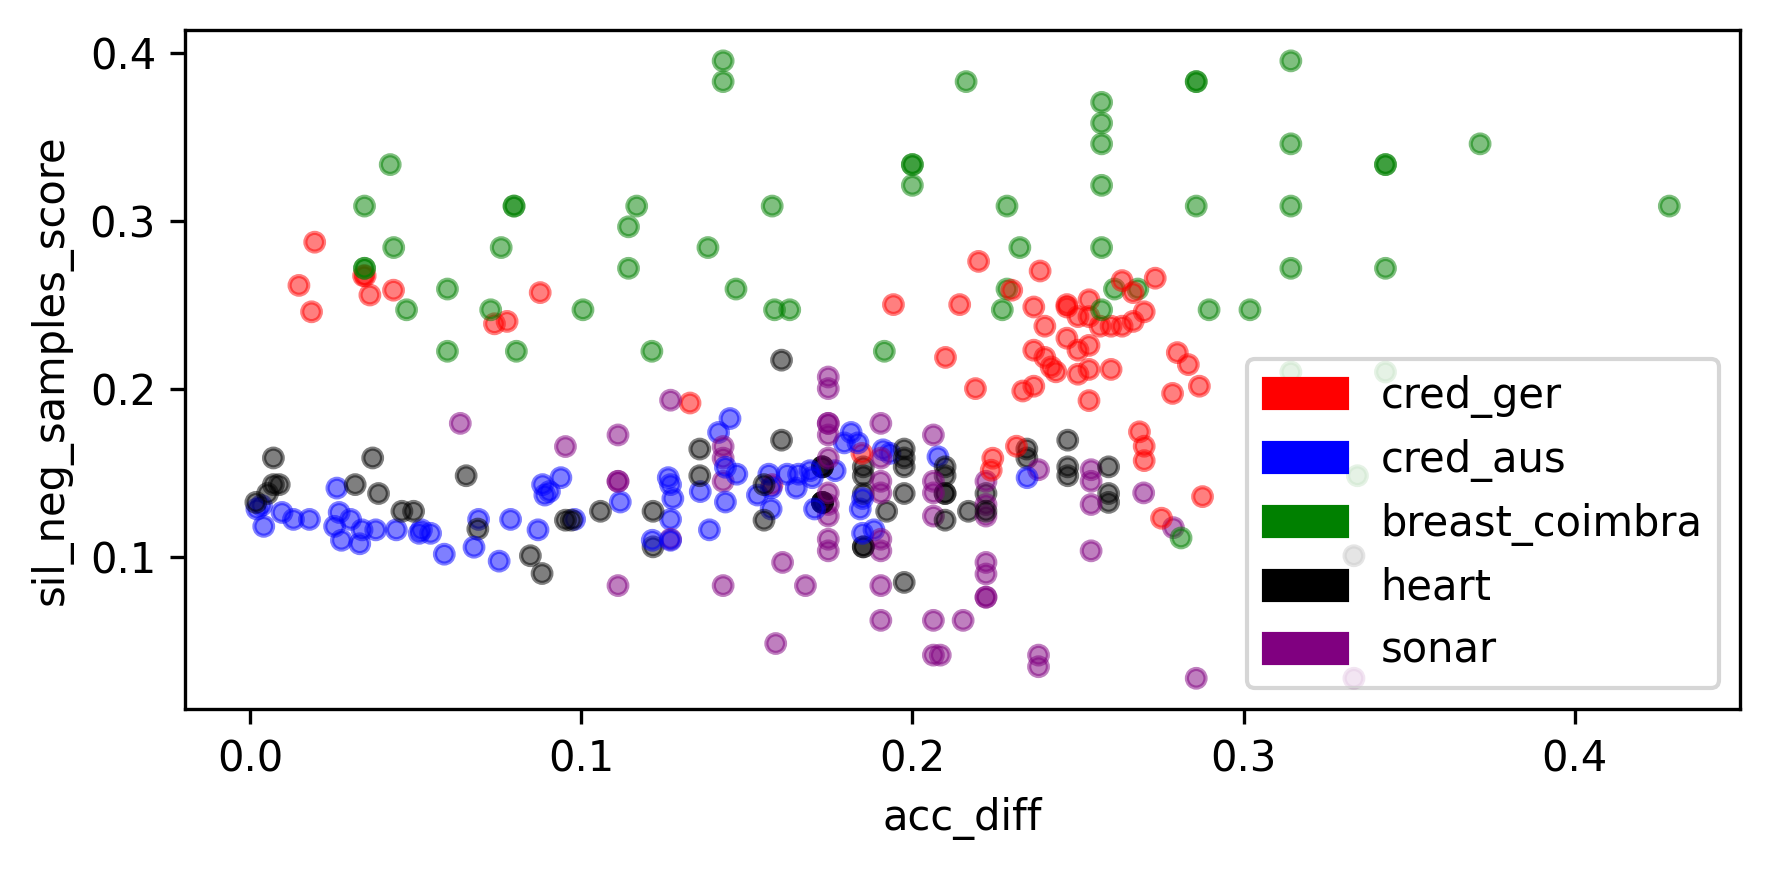

In [17]:
plt.figure(figsize=(6, 3), dpi=300)
ax = plt.gca()
df.plot.scatter(
    x="acc_diff", y="sil_neg_samples_score",
    c=df["dataset"].apply(lambda x: colors[x]),
    alpha=.5, ax=ax
)

plt.legend(handles=[mpatches.Patch(color=v, label=k) for k, v in colors.items()])
plt.tight_layout()
plt.savefig("silneg.pdf")

In [18]:
df.corr(numeric_only=True)

,time,alpha,acc_train,acc_test,best_loss,iterations,silhouette_score,sil_neg_samples_score,calinski_harabasz_score,davies_bouldin_score,acc_diff
time,1.000000,-0.155646,0.124375,-0.020277,-0.125839,0.068514,-0.248819,-0.037415,0.065542,0.497939,0.090801
alpha,-0.155646,1.000000,-0.755763,0.053058,0.811790,-0.744396,0.713450,-0.115607,0.556037,-0.586898,-0.573970
acc_train,0.124375,-0.755763,1.000000,0.013409,-0.894129,0.826134,-0.564289,-0.169906,-0.495576,0.535553,0.698746
acc_test,-0.020277,0.053058,0.013409,1.000000,-0.050016,-0.002138,0.365882,-0.454081,0.332671,-0.376618,-0.695825
best_loss,-0.125839,0.811790,-0.894129,-0.050016,1.000000,-0.697324,0.502820,0.155641,0.416627,-0.471135,-0.599988
iterations,0.068514,-0.744396,0.826134,-0.002138,-0.697324,1.000000,-0.589806,-0.118129,-0.685531,0.472191,0.595607
silhouette_score,-0.248819,0.713450,-0.564289,0.365882,0.502820,-0.589806,1.000000,-0.477253,0.825453,-0.795063,-0.667389
sil_neg_samples_score,-0.037415,-0.115607,-0.169906,-0.454081,0.155641,-0.118129,-0.477253,1.000000,-0.277850,0.515002,0.214396
calinski_harabasz_score,0.065542,0.556037,-0.495576,0.332671,0.416627,-0.685531,0.825453,-0.277850,1.000000,-0.502559,-0.607021
davies_bouldin_score,0.497939,-0.586898,0.535553,-0.376618,-0.471135,0.472191,-0.795063,0.515002,-0.502559,1.000000,0.656306


In [19]:
aux = list()
for name, group in df.groupby("dataset"):
    group["acc_diff"] = group["acc_test"] - group["acc_train"]
    for metric in ["silhouette_score", "sil_neg_samples_score", "calinski_harabasz_score", "davies_bouldin_score"]:
        aux.append({
            "dataset": name,
            "metric": metric,
            "coefs": {
                "acc_test": np.poly1d(np.polyfit(group["acc_test"], group[metric], 1)).coef[0],
                "acc_diff": np.poly1d(np.polyfit(group["acc_diff"], group[metric], 1)).coef[0],
                "alpha": np.poly1d(np.polyfit(group["alpha"], group[metric], 1)).coef[0],
                "best_loss": np.poly1d(np.polyfit(group["best_loss"], group[metric], 1)).coef[0],
            }
        })

In [20]:
(
    pd.json_normalize(aux)
    .pivot(
        index="metric", columns="dataset",
        values=[
            "coefs.acc_test",
            "coefs.acc_diff",
            "coefs.alpha",
            "coefs.best_loss",
        ]
    )
)

coefs.acc_test                                      \
dataset                 breast_coimbra     cred_aus   cred_ger       heart   
metric                                                                       
calinski_harabasz_score     -19.040355  3192.452456  84.249412  709.081848   
davies_bouldin_score          2.806449   -15.672872   4.377914   -7.348075   
sil_neg_samples_score         0.150840    -0.203633   0.291353    0.063971   
silhouette_score             -0.173582     2.329889  -0.018345    1.210121   

                                    coefs.acc_diff                            \
dataset                       sonar breast_coimbra     cred_aus     cred_ger   
metric                                                                         
calinski_harabasz_score -278.337419      56.708231  3282.794047  1122.159006   
davies_bouldin_score       5.408994     -10.276979   -13.707316   -23.358437   
sil_neg_samples_score      0.396318      -0.040794    -0.167759     0.174831   
silhouette_score          -0.752751       0.434762     2.279053     0.859822   

                                                   coefs.alpha              \
dataset                       heart       sonar breast_coimbra    cred_aus   
metric                                                                       
calinski_harabasz_score  726.250572 -259.686022       7.951856  212.983521   
davies_bouldin_score      -7.027485    5.140707      -1.385644   -0.807698   
sil_neg_samples_score     -0.013139    0.385598      -0.015525   -0.009204   
silhouette_score           1.184154   -0.708352       0.062997    0.141038   

                                                         coefs.best_loss  \
dataset                   cred_ger      heart      sonar  breast_coimbra   
metric                                                                     
calinski_harabasz_score  82.126451  70.151642  17.077172       44.822100   
davies_bouldin_score     -1.861070  -0.624424  -0.357504       -8.529571   
sil_neg_samples_score     0.007212  -0.004981  -0.018697       -0.134351   
silhouette_score          0.063719   0.108706   0.051251        0.361823   

                                                                          
dataset                     cred_aus    cred_ger       heart       sonar  
metric                                                                    
calinski_harabasz_score  1849.912708  471.697950  558.389486  226.329303  
davies_bouldin_score       -7.998385  -12.124880   -5.601440   -4.897845  
sil_neg_samples_score      -0.110204    0.008910   -0.051267   -0.221922  
silhouette_score            1.295994    0.377388    0.919654    0.688238

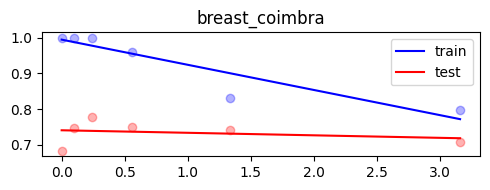

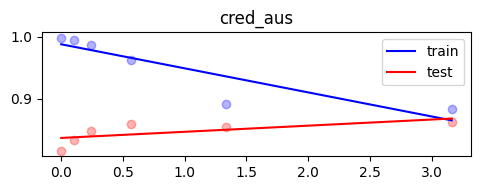

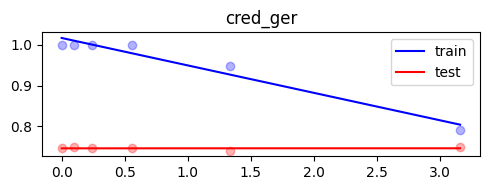

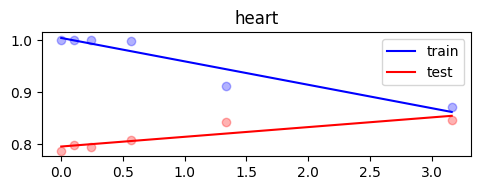

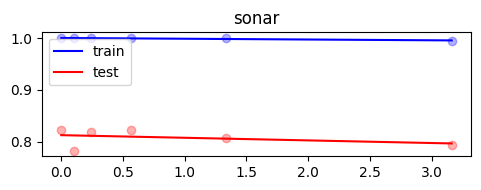

In [21]:
for name, group in df.groupby(["dataset", "alpha"], as_index=False).mean().groupby("dataset"):
    x = group["alpha"]
    poly_train = np.poly1d(np.polyfit(group["alpha"], group["acc_train"], 1))
    poly_test = np.poly1d(np.polyfit(group["alpha"], group["acc_test"], 1))

    plt.figure(figsize=(5, 2))
    ax = plt.gca()
    plt.plot(x, poly_train(x), label="train", color="blue")
    plt.plot(x, poly_test(x), label="test", color="red")
    plt.scatter(x, group["acc_train"], color="blue", alpha=.3)
    plt.scatter(x, group["acc_test"], color="red", alpha=.3)
    plt.legend()
    plt.title(name)
    plt.tight_layout()
    plt.show()
    plt.close()

# Results Unnamed

In [22]:
files = glob("src/results-unnamed/*.json")

aux = list()
for file in files:
    with open(file, "r") as f:
        aux.append(json.load(f))
df = pd.json_normalize(aux)

In [23]:
df["acc_diff"] = df["acc_train"] - df["acc_test"]

In [24]:
df.head()

,alpha,acc_train,acc_test,best_loss,iterations,silhouette_score,sil_neg_samples_score,calinski_harabasz_score,davies_bouldin_score,acc_diff
0,0.000000,0.993789,0.797101,0.012605,1024,0.086840,0.155280,46.229656,3.163873,0.196687
1,1.832981,0.854286,0.786667,0.410940,1024,0.081245,0.308571,57.725481,2.895714,0.067619
2,0.172521,1.000000,0.756667,0.076238,1024,0.022373,0.212857,12.200317,6.915754,0.243333
3,1.528307,1.000000,0.793651,0.138782,1024,0.212515,0.082759,43.039692,1.722140,0.206349
4,2.636651,0.814286,0.786667,0.458974,1024,0.152497,0.252857,130.078353,1.869525,0.027619


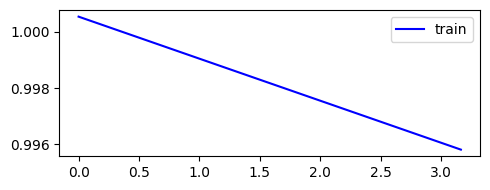

In [25]:
poly = np.poly1d(np.polyfit(df["acc_diff"], df["davies_bouldin_score"], 1))

plt.figure(figsize=(5, 2))
ax = plt.gca()
plt.plot(x, poly_train(x), label="train", color="blue")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()
